In [1]:
import ownership_curve as oc

In [2]:
own_df = oc.UpdateOwnershipDB()

In [3]:
own_df['Delta'] = own_df['Own.{0}'.format(oc.date_string)] - own_df['Own.{0}'.format(oc.last_week)]
own_df_sort = own_df.sort_values(by = ['Delta'])
highest_climbers = list(own_df_sort[-10:]['Player'])
biggest_fallers = list(own_df_sort[:10]['Player'])

In [4]:
print(highest_climbers)

['Patrick Wisdom ', 'Jose Urquidy ', 'Nick Lodolo ', 'Paul Sewald ', 'Yandy Diaz ', 'Johnny Cueto ', 'Nick Senzel ', 'Spencer Strider ', 'Isaac Paredes ', 'Tyler Wells ']


In [5]:
print(biggest_fallers)

['Anthony DeSclafani ', 'Mitch Garver ', 'Kyle Farmer ', 'Chris Taylor ', 'Brendan Donovan ', 'Michael Wacha ', 'Thairo Estrada ', 'Jurickson Profar ', 'Jorge Alfaro ', 'Michael Lorenzen ']


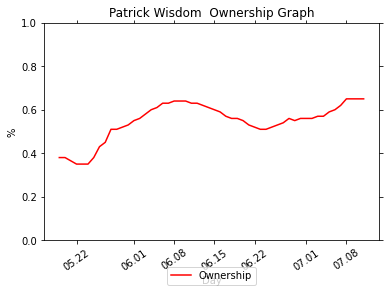

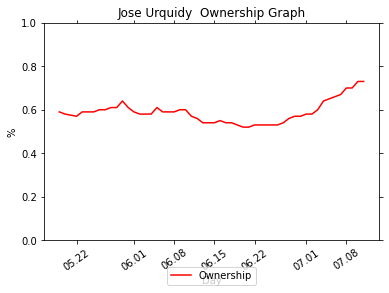

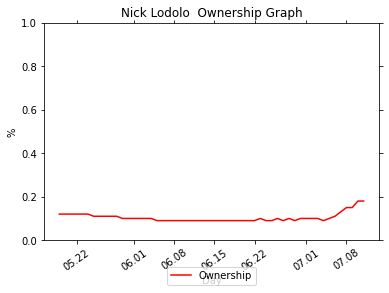

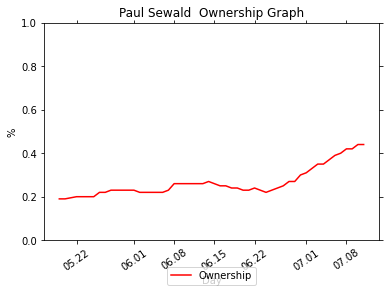

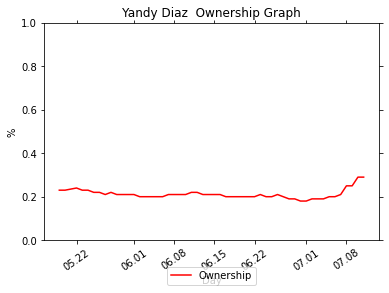

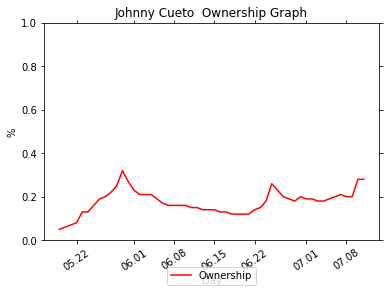

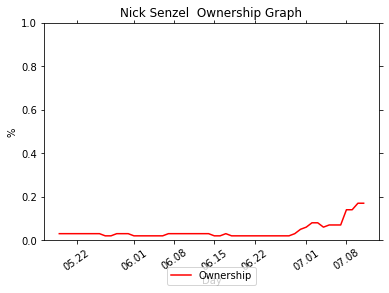

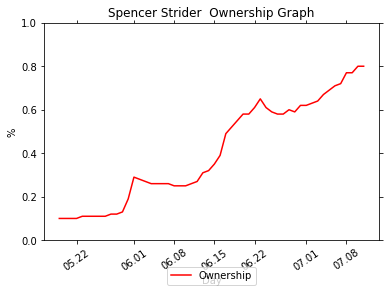

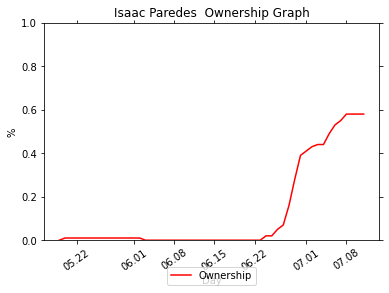

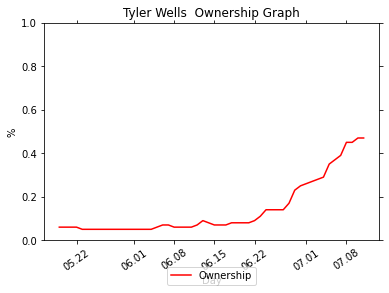

In [6]:
graphs = []
for player in highest_climbers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

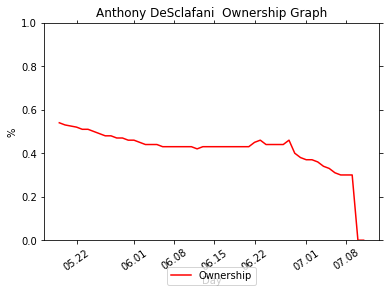

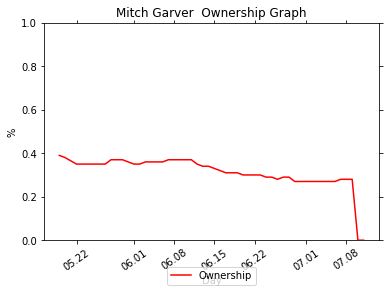

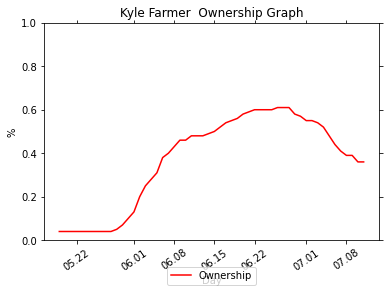

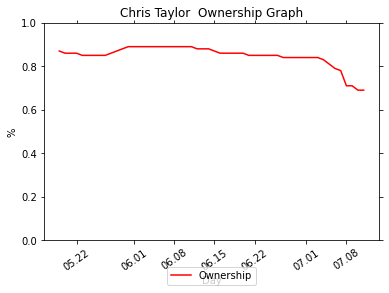

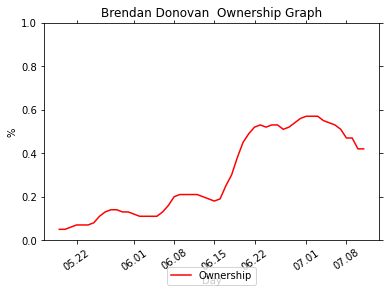

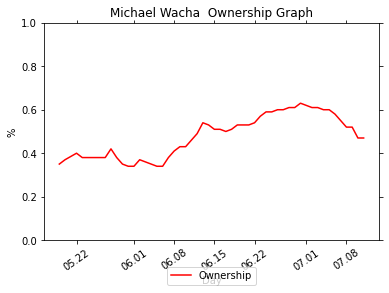

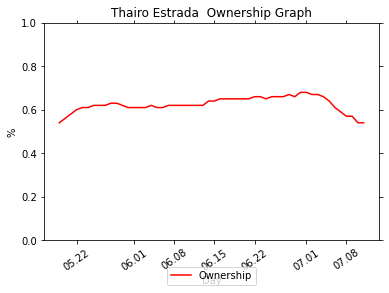

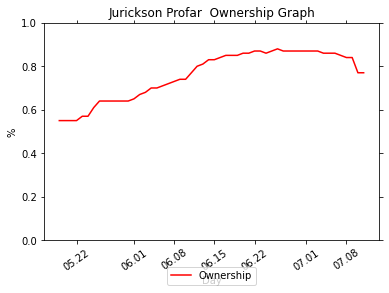

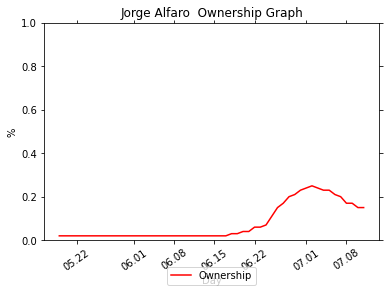

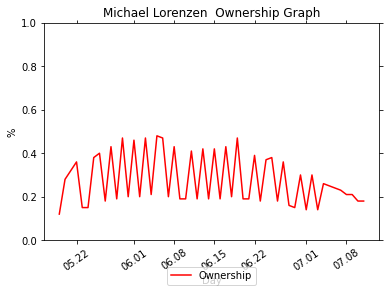

In [7]:
graphs = []
for player in biggest_fallers:
     oc.GraphPlayer(own_df, player)
     new_graph = 'graphs/{}.png'.format(player)
     oc.plt.savefig(new_graph)
     im1 = oc.Image.open(new_graph)
     graphs.append(im1)
    
oc.get_concat_h(graphs).save('graphs/highest_climbers.jpg')

In [8]:
data_file = "data/fp_proj_{0}_{1}.csv"
hit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'hitters')
dfHit = oc.pd.read_csv(data_file.format('hit', oc.date_string))   
dfHit_pre = oc.pd.read_csv(data_file.format('hit', '20220519')) 

dfHit = oc.lim_hit_scope(dfHit)
hit_stats = oc.lim_hit_scope(hit_stats)
hit_stats['PlayerId'] = hit_stats['PlayerId'].astype(int)
dfHit_pre = oc.lim_hit_scope(dfHit_pre)

dfHit = oc.pd.concat([dfHit, hit_stats])
dfHit = dfHit.groupby(['Player', 'PlayerId'], as_index = False).sum()
dfHit = dfHit.merge(dfHit_pre, how= 'left', on = ['Player', 'PlayerId'])
dfHit = dfHit.loc[dfHit['Rost_y']==dfHit['Rost_y']]

interesting_plus = []
for i in ['R+RBI_', 'HR+SB_', 'H_']:
    dfHit[i+'Delta'] = dfHit[i+'x'] - dfHit[i+'y']
    dfHit = dfHit.sort_values(by = [i+'Delta'])
    highest_climbers = list(dfHit[-5:]['Player'])
    interesting_plus.extend(highest_climbers)

interesting_plus = list(set(interesting_plus))
print(interesting_plus)

['Jon Berti ', 'Andrew Velazquez ', 'Brendan Donovan ', 'Franchy Cordero ', 'Thairo Estrada ', 'Brandon Drury ', 'Julio Rodriguez ', 'Yonathan Daza ', 'Aaron Judge ', 'Luis Gonzalez ', 'Owen Miller ']


Jon Berti , Andrew Velazquez , Brendan Donovan , Franchy Cordero , Thairo Estrada , Brandon Drury , Julio Rodriguez , Yonathan Daza , Aaron Judge , Luis Gonzalez , Owen Miller , 

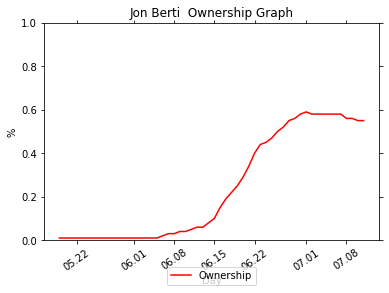

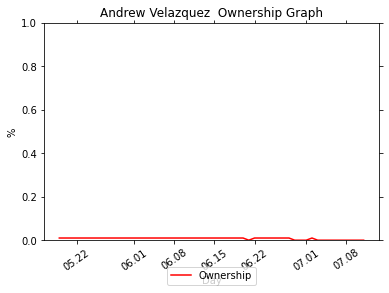

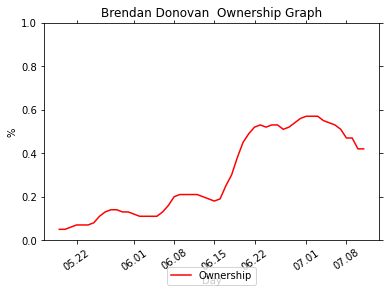

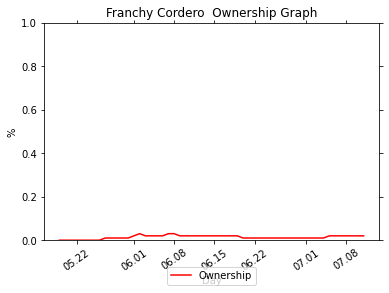

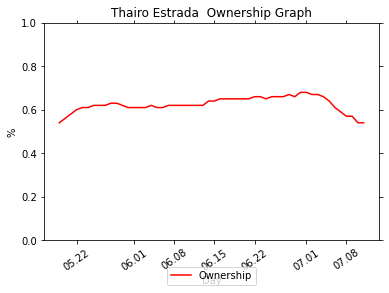

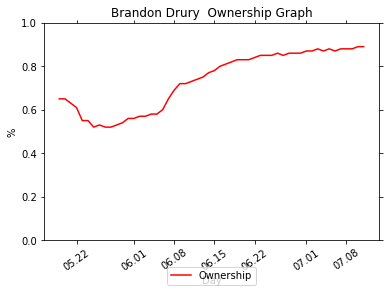

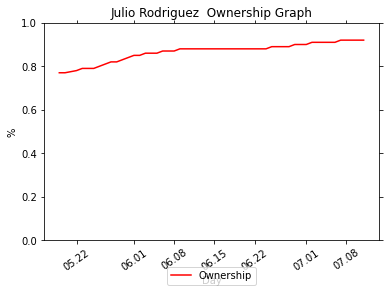

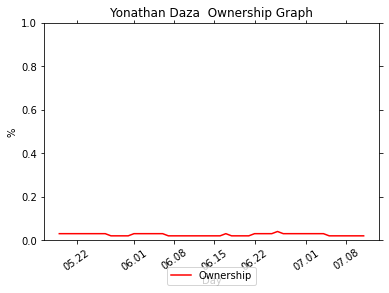

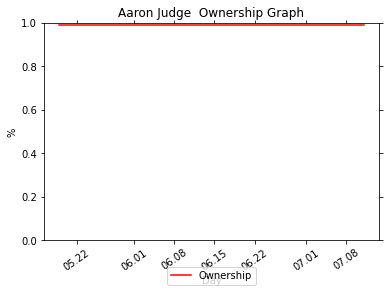

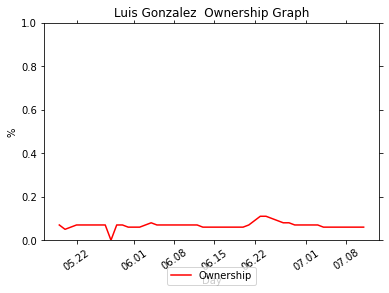

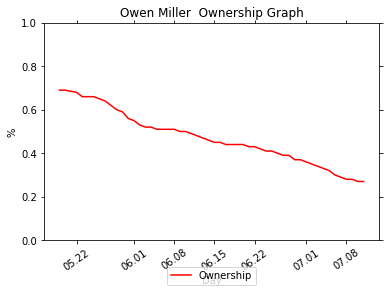

In [9]:
for player in interesting_plus:
     oc.GraphPlayer(own_df, player)
     print(player, end = ", ")

In [12]:
data_file = "data/fp_proj_{0}_{1}.csv"
pit_stats = oc.stat_scraping.get_fantasy_pros_stats(player_type = 'pitchers')
dfPit = oc.pd.read_csv(data_file.format('pit', oc.date_string))   
dfPit_pre = oc.pd.read_csv(data_file.format('pit', '20220519')) 

dfPit = oc.lim_pit_scope(dfPit)
pit_stats = oc.lim_pit_scope(pit_stats)
pit_stats['PlayerId'] = pit_stats['PlayerId'].astype(int)
dfPit_pre = oc.lim_pit_scope(dfPit_pre)

dfPit = oc.pd.concat([dfPit, pit_stats])
dfPit = dfPit.groupby(['Player', 'PlayerId'], as_index = False).sum()
dfPit = dfPit.merge(dfPit_pre, how= 'left', on = ['Player', 'PlayerId'])
dfPit = dfPit.loc[dfPit['Rost_y']==dfPit['Rost_y']]

interesting_plus_pit = []
for i in ['W+SV_', 'IP_', 'K_']:
    dfPit[i+'Delta'] = dfPit[i+'x'] - dfPit[i+'y']
    dfPit = dfPit.sort_values(by = [i+'Delta'])
    highest_climbers_pit = list(dfPit[-5:]['Player'])
    interesting_plus_pit.extend(highest_climbers_pit)

interesting_plus_pit = list(set(interesting_plus_pit))
print(interesting_plus_pit)

['Clay Holmes ', 'Keegan Thompson ', 'Devin Smeltzer ', 'Paul Blackburn ', 'Andre Pallante ', 'Jeffrey Springs ', 'Kyle Wright ', 'Jorge Lopez ', 'Daniel Bard ', 'Tanner Scott ', 'Spencer Strider ', 'Dany Jimenez ', 'Hunter Greene ']


Clay Holmes , Keegan Thompson , Devin Smeltzer , Paul Blackburn , Andre Pallante , Jeffrey Springs , Kyle Wright , Jorge Lopez , Daniel Bard , Tanner Scott , Spencer Strider , Dany Jimenez , Hunter Greene , 

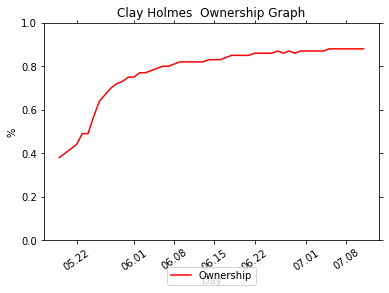

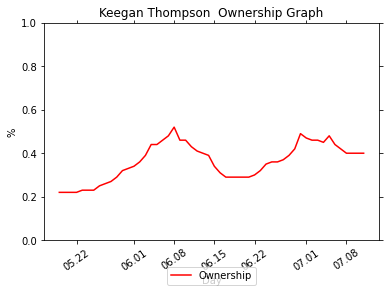

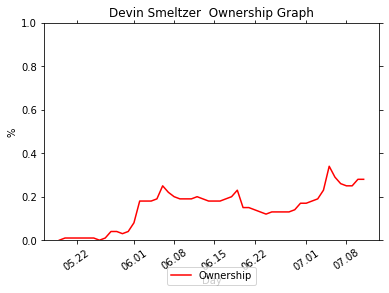

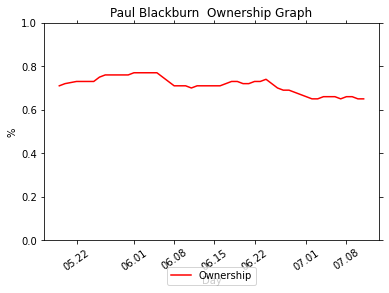

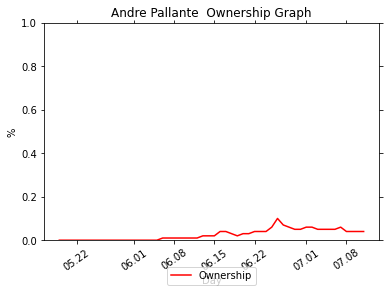

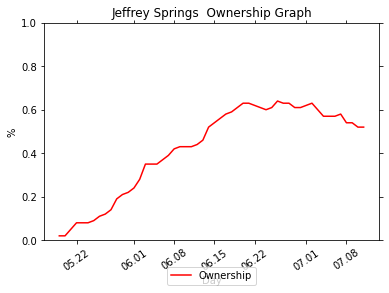

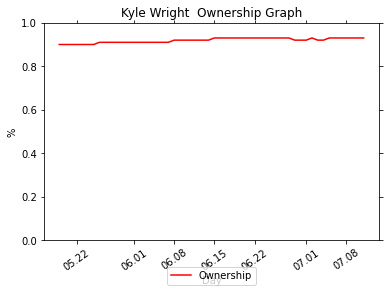

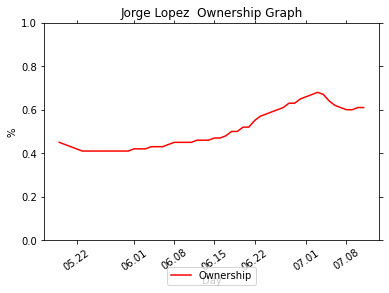

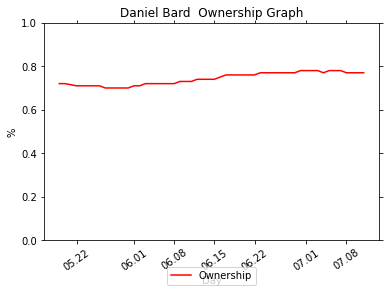

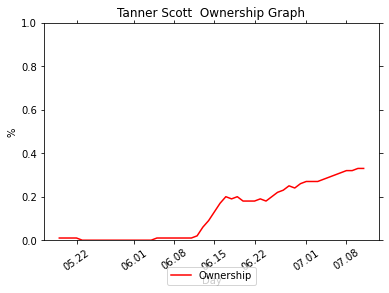

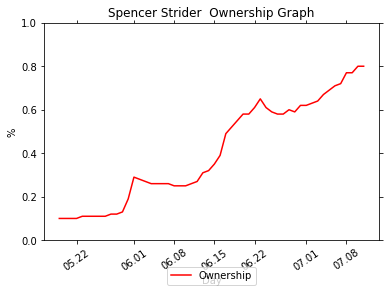

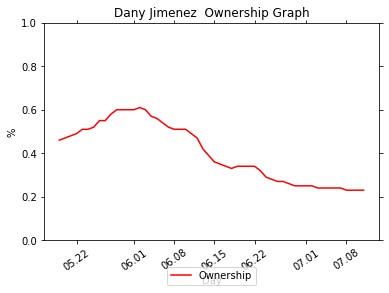

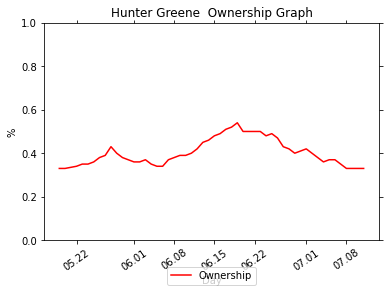

In [13]:
for player in interesting_plus_pit:
     oc.GraphPlayer(own_df, player)
     print(player, end = ", ")